Here we will try to see what type of activity corelates most with low attention rates

In [27]:
import pandas as pd
import numpy as np
import os

In [28]:
def get_csv_data(path_logs, path_csv):
    data = pd.read_csv(path_csv, sep='\t')
    dfs = []
    for dirname, _, filenames in os.walk(path_logs):
        for filename in filenames:
            if filename.endswith('.csv'):
                file_path = os.path.join(dirname, filename).replace('\\', '/')
                df = pd.read_csv(file_path,sep=' ')
                
                row = data.loc[data['log_id'] == int(filename[:-4])] # https://stackoverflow.com/questions/17071871/how-do-i-select-rows-from-a-dataframe-based-on-column-values
                # print(row)
                arr = row.values.tolist()
                arr.append(df)
                dfs.append(arr)
    return dfs

In [29]:
dfs = get_csv_data('../the-attentive-cursor-dataset/logs', '../the-attentive-cursor-dataset/groundtruth.tsv')

In [30]:
print("Attention score : ",dfs[0][0][2])
print("log_id : ",dfs[0][0][3])
# print("actions dataframe : ",dfs[0][1])

Attention score :  5
log_id :  20161214224444


In [31]:
print("size of the dataset : ",len(dfs))

#count the number of values for each attention score
attention_scores = []
for i in range(len(dfs)):
    attention_scores.append(dfs[i][0][2])
count_attention_scores =np.bincount(attention_scores)

size of the dataset :  1548


<BarContainer object of 6 artists>

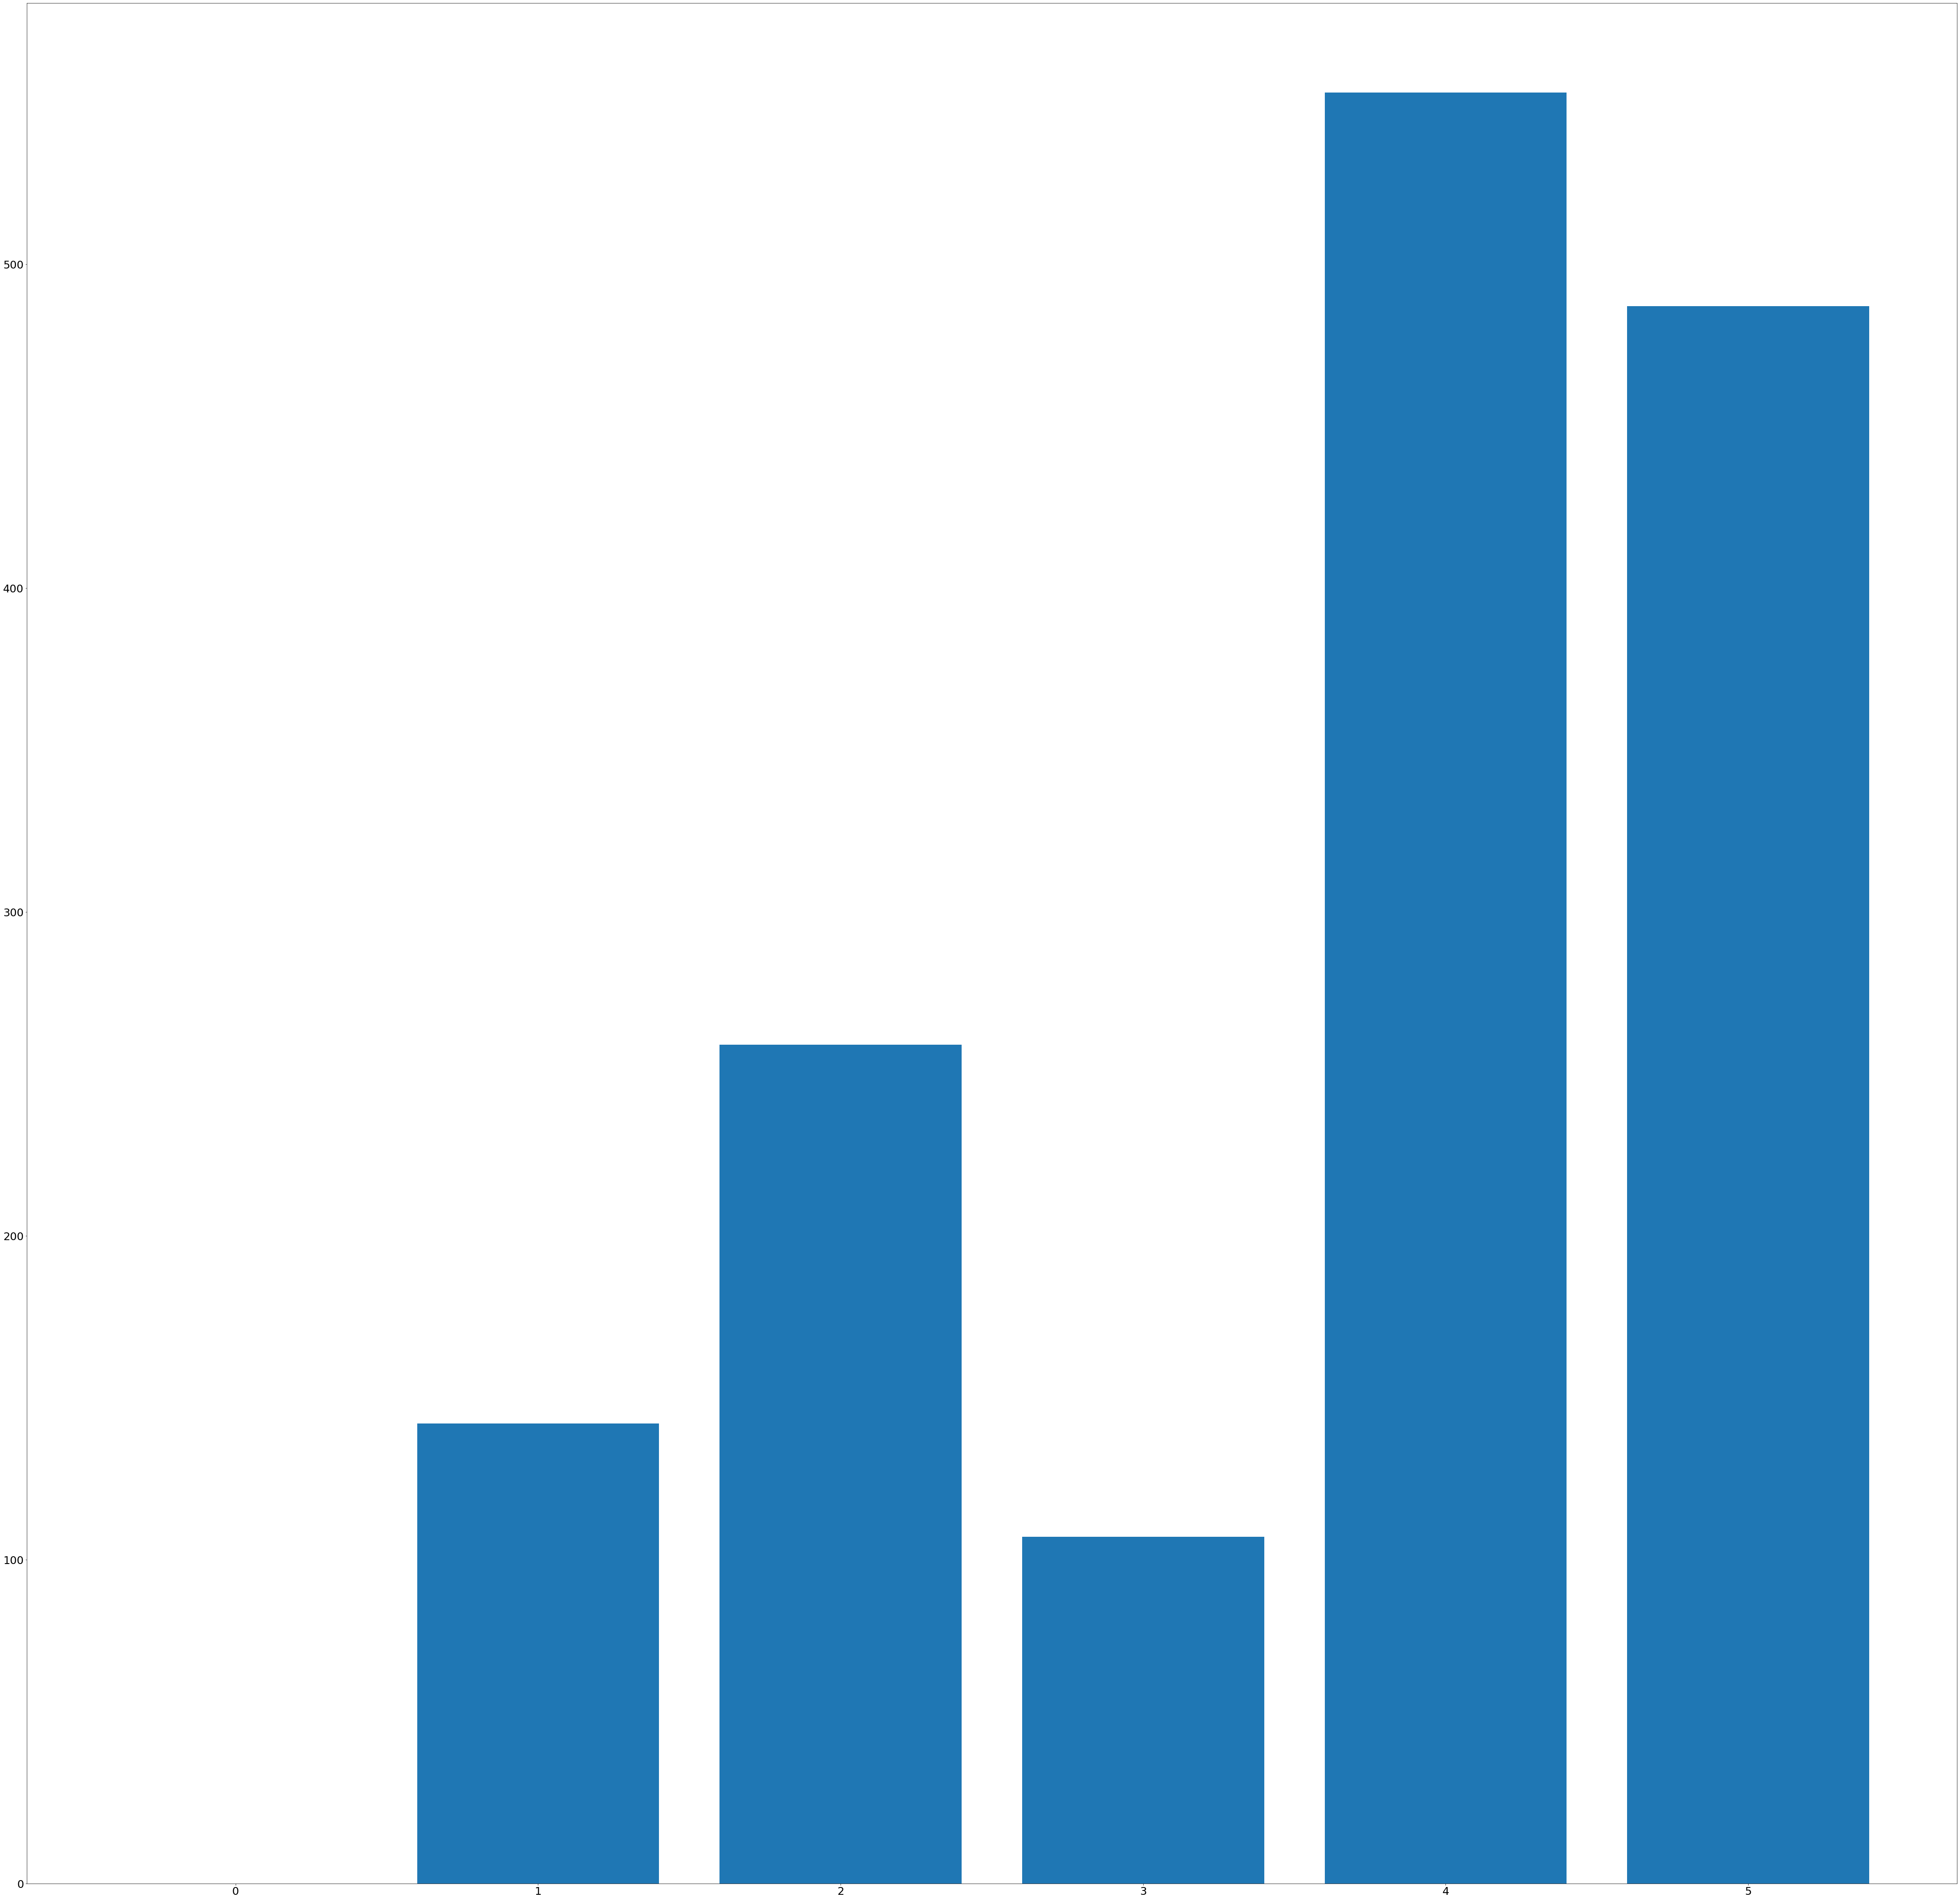

In [32]:
import matplotlib.pyplot as plt

#bar plot of attention score
plt.bar(range(len(count_attention_scores)), count_attention_scores)

In [33]:
print(dfs[0][1]['event'].value_counts())

scroll          61
mousemove       22
mouseover        9
mousedown        6
mouseup          5
blur             3
focus            3
click            2
load             1
contextmenu      1
beforeunload     1
unload           1
Name: event, dtype: int64


In [34]:
cleandf = []
for row in range(len(dfs)):
    cleandf.append([dfs[row][0][2],dfs[row][1]['event'].value_counts()])
print(cleandf)

[[5, scroll          61
mousemove       22
mouseover        9
mousedown        6
mouseup          5
blur             3
focus            3
click            2
load             1
contextmenu      1
beforeunload     1
unload           1
Name: event, dtype: int64], [2, mousemove       9
scroll          7
mouseover       3
load            1
mousedown       1
mouseup         1
click           1
beforeunload    1
Name: event, dtype: int64], [4, mousemove       39
scroll          11
mouseover        3
blur             2
load             1
focus            1
beforeunload     1
unload           1
Name: event, dtype: int64], [2, mousemove       33
scroll          17
mouseover       13
blur             4
focus            4
load             1
mousedown        1
mouseup          1
click            1
beforeunload     1
unload           1
Name: event, dtype: int64], [4, mousemove       9
mouseover       3
blur            2
focus           2
load            1
beforeunload    1
unload          1
Name: ev

In [35]:
counting = pd.Series()
for row in range(len(cleandf)) :
    for column in cleandf[row][1].keys() :
        if counting.get(column) is None :
            counting[column] = 0
        counting[column] += cleandf[row][1][column]
print(counting)


C:\Users\jules_000.PC-FAMILLE\AppData\Local\Temp\ipykernel_8168\2651547616.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  counting = pd.Series()


scroll           7765
mousemove       23208
mouseover        5961
mousedown        1931
mouseup          1926
blur             1090
focus            1513
click            1565
load             1530
contextmenu        27
beforeunload     1536
unload           1523
resize             36
select            100
keydown          1034
keyup             296
touchstart         19
touchend           19
touchmove          18
copy                4
dtype: int64


<BarContainer object of 20 artists>

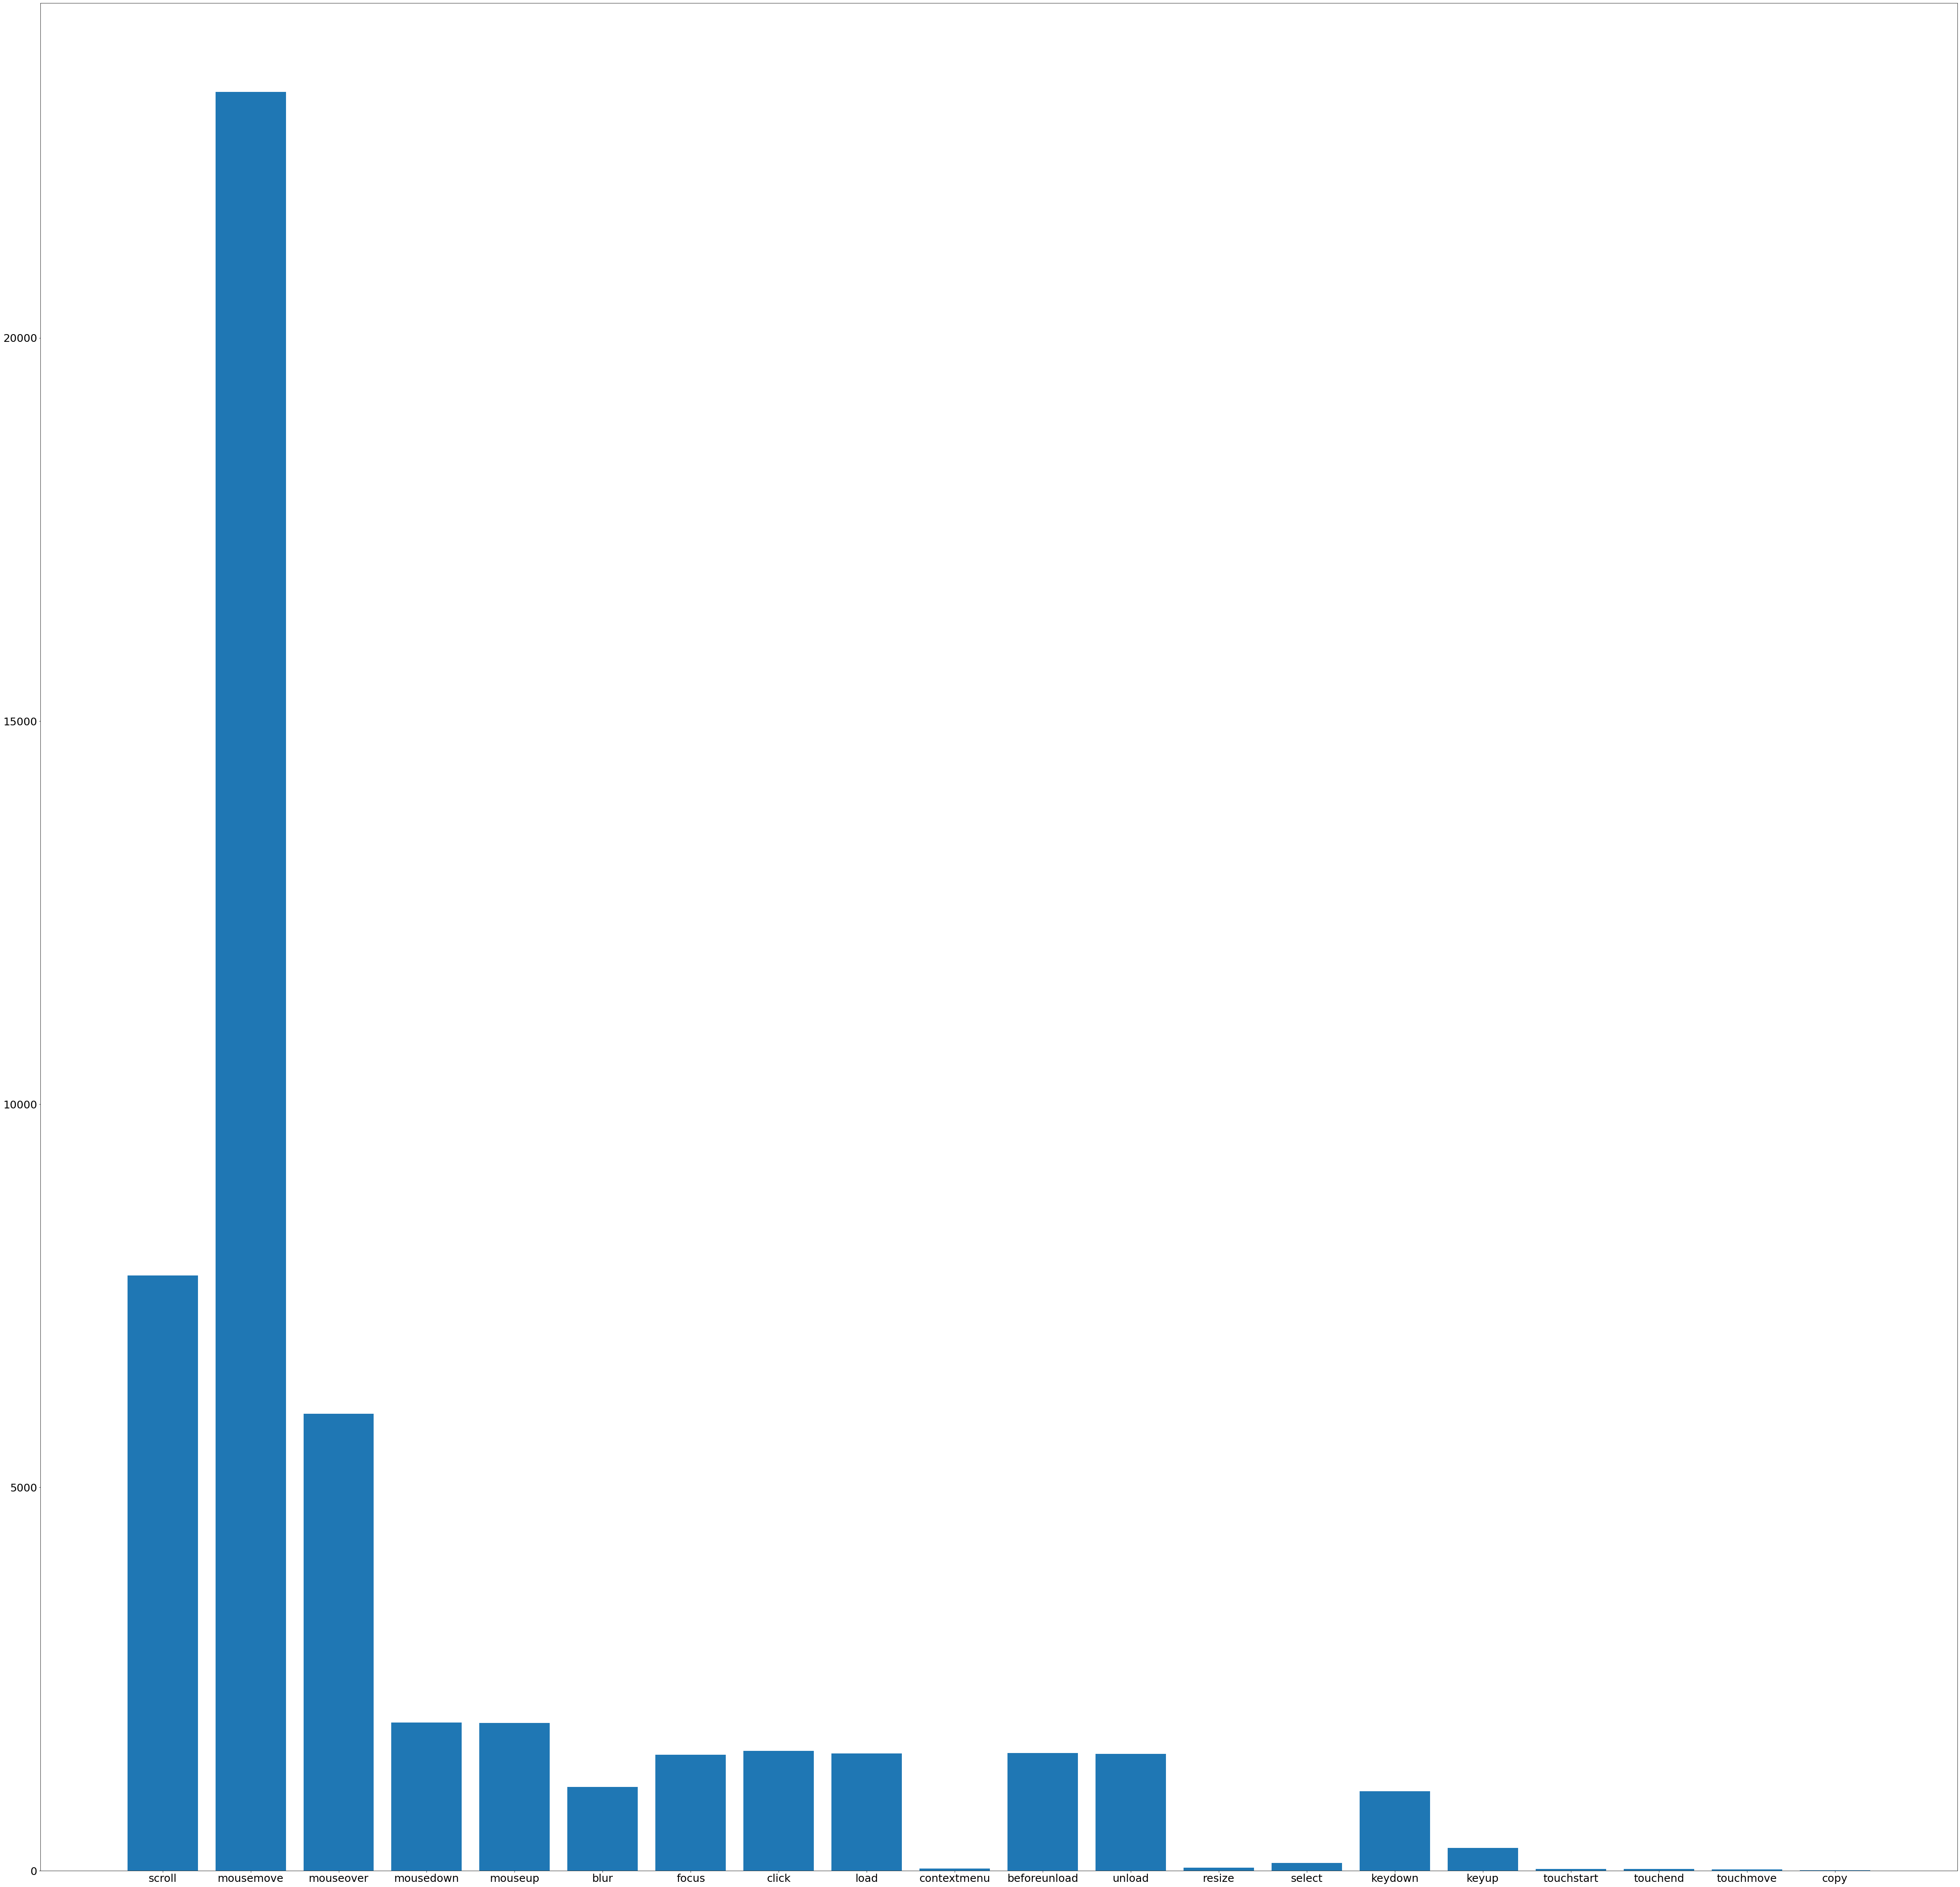

In [36]:
plt.bar(counting.keys(), counting)

In [37]:
ratio = []
ratioy = []
tmp = []

def sum (array) :
    tmp = 0
    for num in array :
        tmp += num
    return tmp

for row in range(len(cleandf)) :
    index =  cleandf[row][1].sum()
    if index not in tmp :
        ratio.append([ index,[cleandf[row][0]]])
        tmp.append(index)
    else :
        ratio[tmp.index(index)][1].append(cleandf[row][0])

ratio.sort()
tmp.sort()
for row in range(len(ratio)) :
    ratioy.append(sum(ratio[row][1])/len(ratio[row][1]))
    

print(ratioy)
        

[3.25, 2.5, 4.0, 3.769230769230769, 3.9, 3.8636363636363638, 3.625, 3.693877551020408, 3.849056603773585, 3.8275862068965516, 3.6037735849056602, 3.760869565217391, 3.5416666666666665, 3.736842105263158, 3.7857142857142856, 4.155555555555556, 3.7954545454545454, 3.5, 3.4166666666666665, 3.5, 3.235294117647059, 3.35, 3.6785714285714284, 4.0, 3.12, 3.5555555555555554, 3.6, 3.5454545454545454, 3.6666666666666665, 3.409090909090909, 4.041666666666667, 3.3181818181818183, 3.238095238095238, 3.769230769230769, 3.5, 3.388888888888889, 3.6818181818181817, 3.652173913043478, 4.0, 3.4166666666666665, 3.3076923076923075, 3.5714285714285716, 3.7, 4.0, 3.8666666666666667, 3.1333333333333333, 2.8, 3.230769230769231, 3.5454545454545454, 4.222222222222222, 3.125, 3.7142857142857144, 3.2857142857142856, 4.111111111111111, 3.375, 4.25, 4.0, 4.142857142857143, 3.4285714285714284, 4.0, 3.4, 4.2, 4.0, 3.3333333333333335, 3.6666666666666665, 4.0, 5.0, 4.0, 2.75, 3.625, 3.0, 3.8, 2.0, 3.25, 2.333333333333333

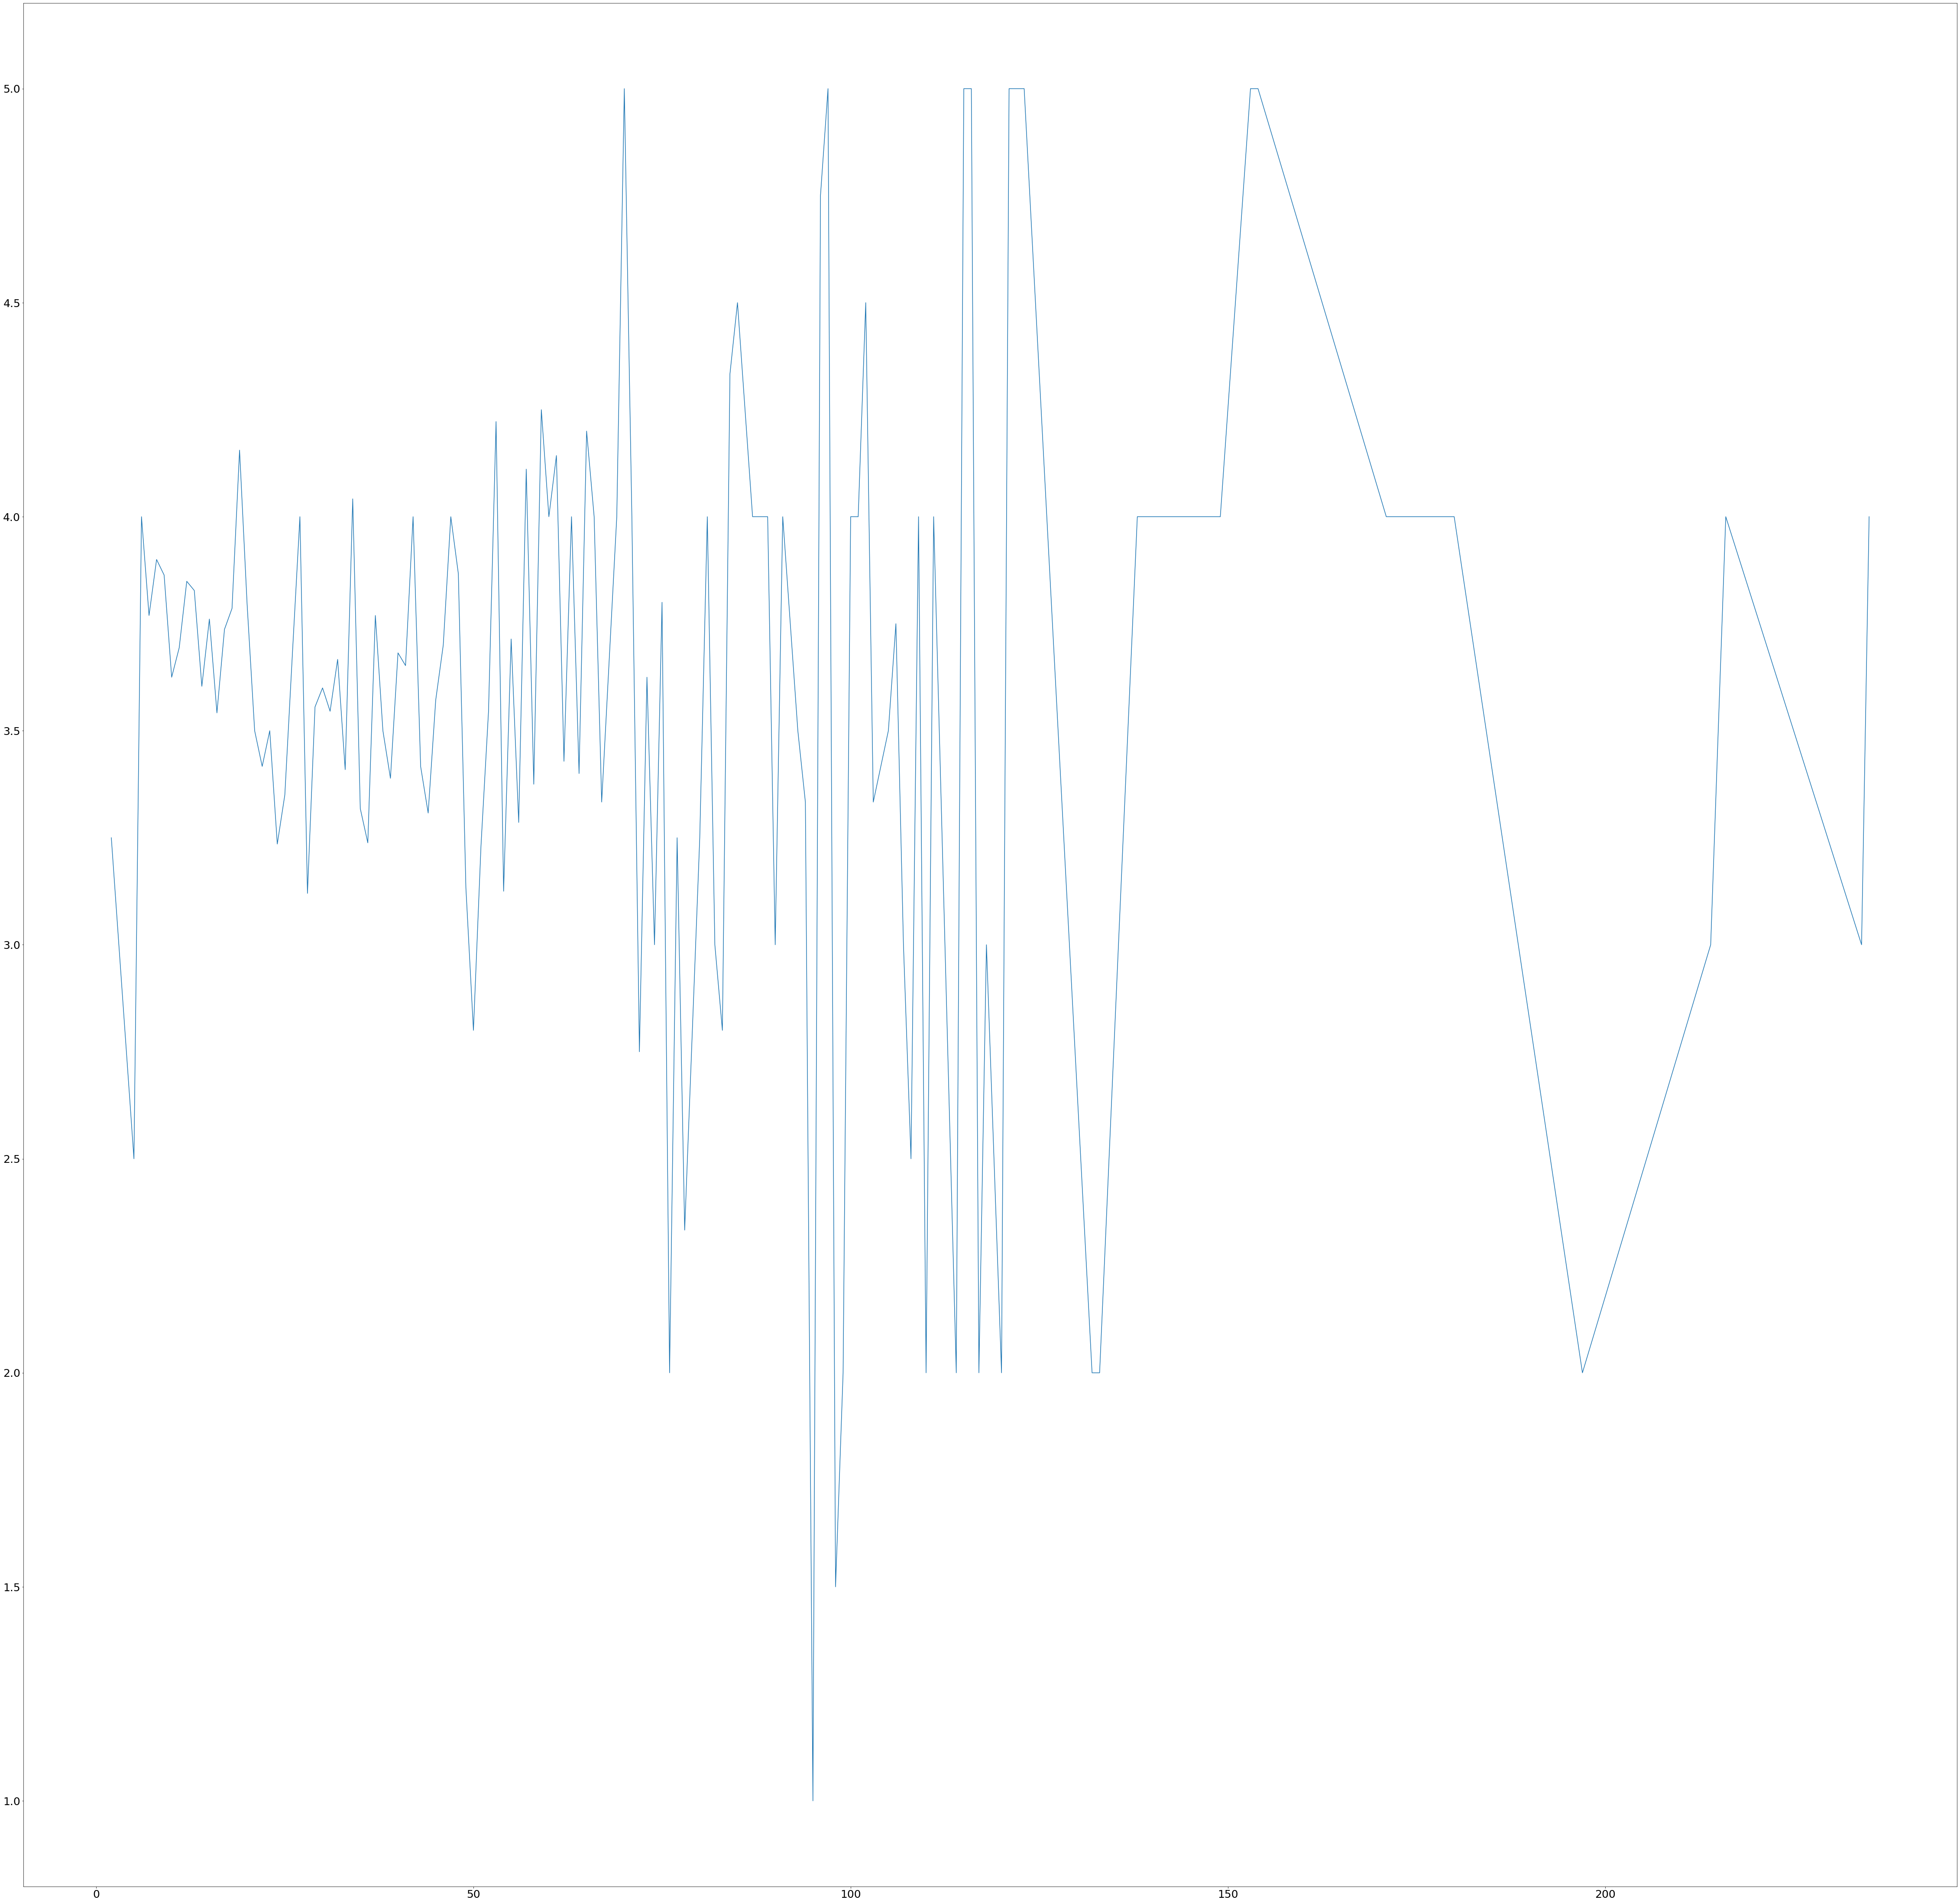

In [38]:
plt.plot(tmp,ratioy)

In [39]:
#heatmap
def customround (num) :
    if num == 0 :
        return 0
    elif num <= 5:
        return 5
    elif num <= 10 :
        return 10
    elif num <= 25 :
        return 25
    elif num <= 50 :
        return 50
    elif num <= 75 :
        return 75
    else:
        return 100


heatdf = []

for row in range(len(cleandf)) :
    heatdf.append([cleandf[row][0],cleandf[row][1].apply(customround)])

xy = []
x = []
y=[0,5,10,25,50,75,100]

for row in heatdf :
    for input in row[1].keys() :
        if input not in x :
            x.append(input)

for i in range(len(x)) :
    xy.append([])
for i in range(len(y)) :
    for ligne in xy :
        ligne.append([])

for input in x :
    for value in y:
        for row in heatdf:
            if input in row[1].keys() and value == row[1].get(input) :
                xy[x.index(input)][y.index(value)].append(row[0])




"""
for row in heatdf :
    for input in row[1].keys() :
        value = row[1].get(input)
        if value not in y :
            y.append(value)
        if input not in x :
            x.append(input)
            xy.append([])
        for i in range(y.index(value)+1 - len(xy[x.index(input)])):
            xy[x.index(input)].append([])
        xy[x.index(input)][y.index(value)].append(row[0])
        """

for row in xy :
    for case in row :
        tmp = 0
        for num in case :
            tmp += num
        if len(case) > 0 :
            tmp = tmp/len(case)
        else : 
            tmp = 0
        xy[xy.index(row)][row.index(case)] = tmp
        

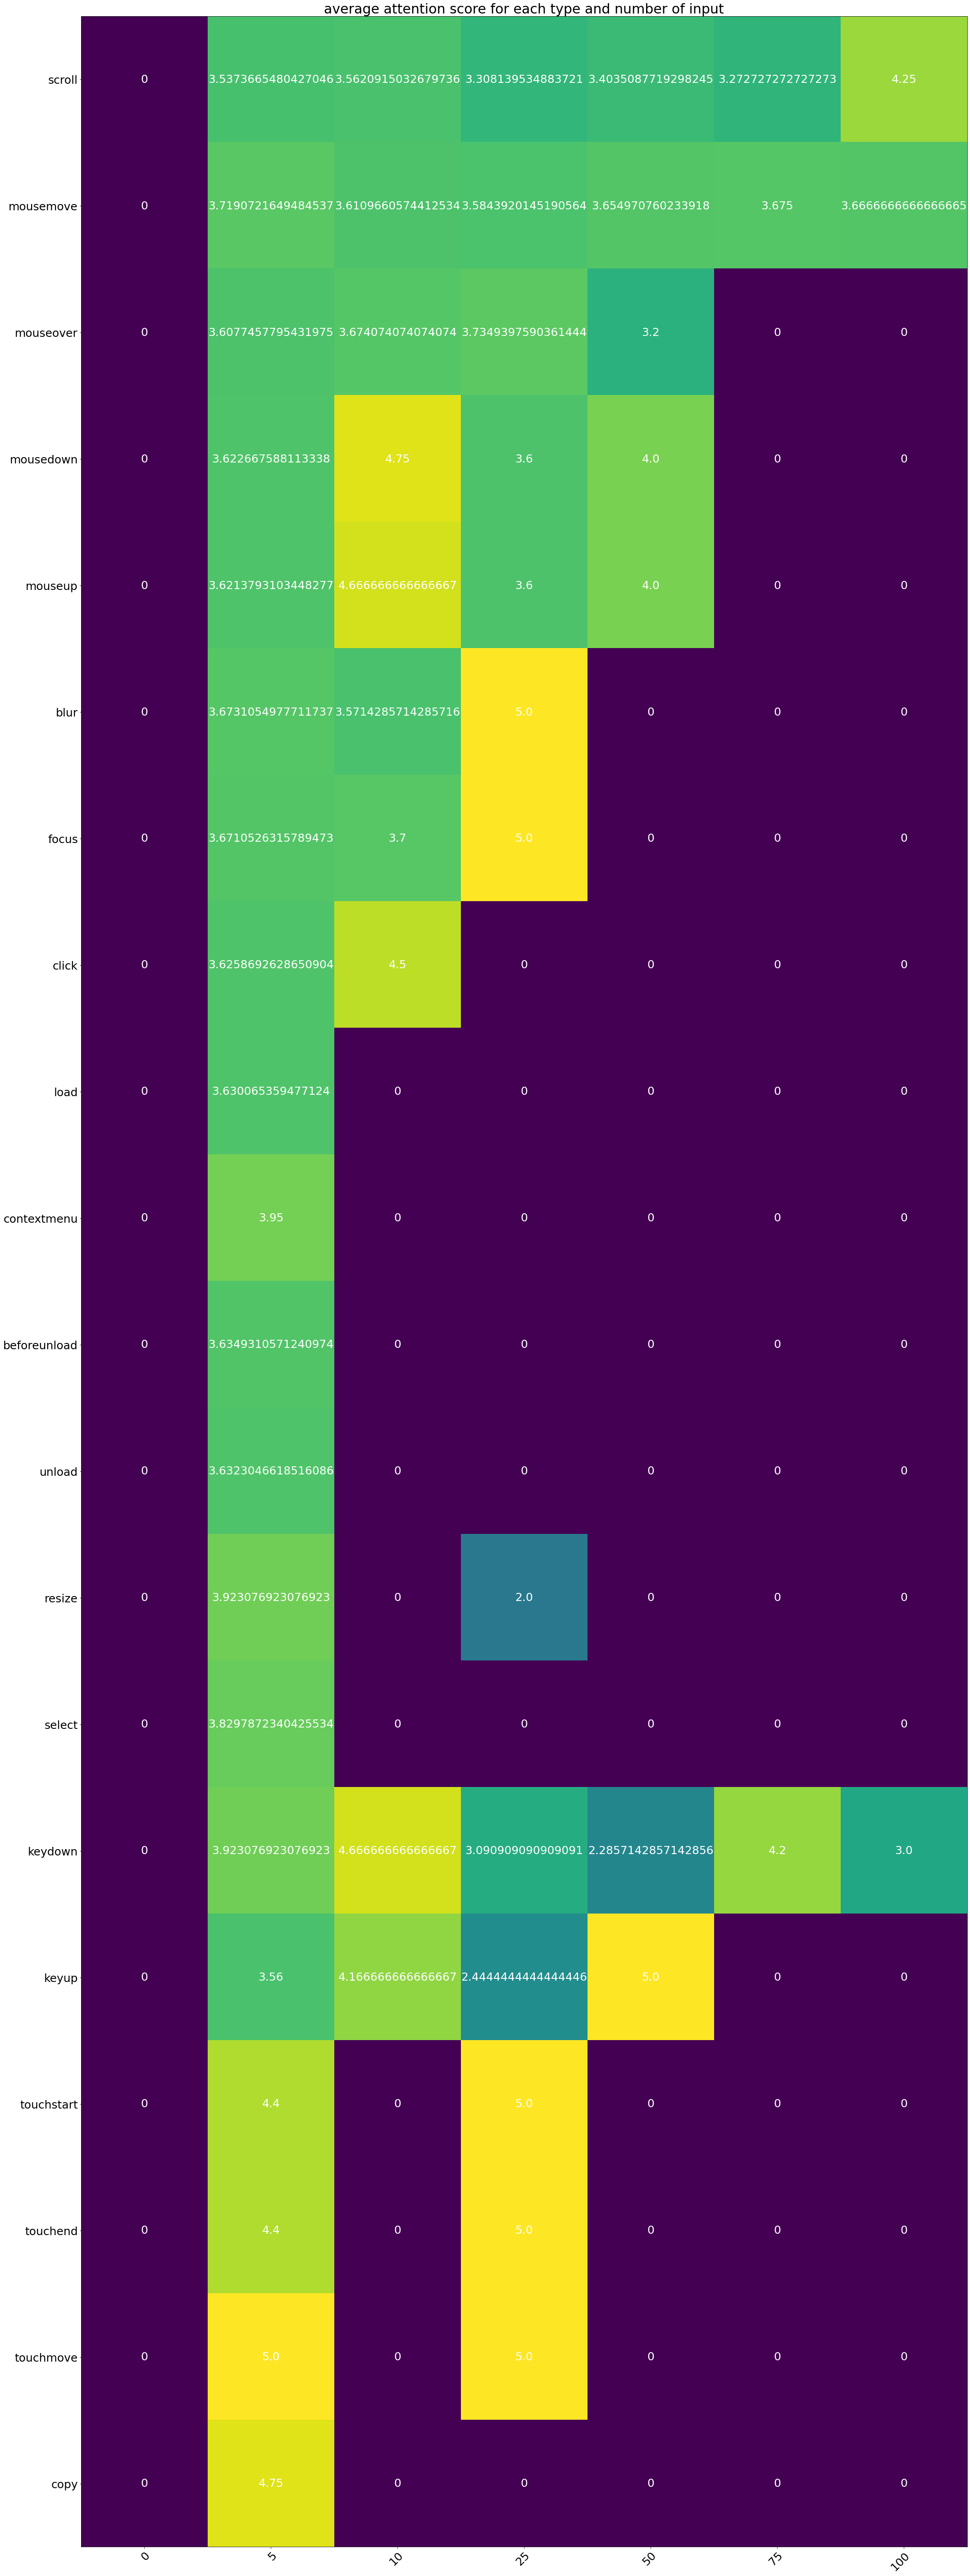

In [40]:
plt. rcParams["figure.figsize"] = (80,80)
plt.rcParams.update({'font.size': 25})

fig, ax = plt.subplots()
im = ax.imshow(xy)

ax.set_xticks(np.arange(len(y)), labels=y)
ax.set_yticks(np.arange(len(x)), labels=x)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

for i in range(len(x)):
    for j in range(len(y)):
        text = ax.text(j, i, xy[i][j],
                       ha="center", va="center", color="w")

ax.set_title("average attention score for each type and number of input")
fig.tight_layout()
plt.show()

In [56]:
#heatmap percentage

tresholds = []
for input in x :
    tmp = []
    tresholds.append([])
    for i in range(3) :
        tresholds[x.index(input)].append([])
    for row in cleandf :
       if input in row[1].keys() :
           tmp.append(row[1].get(input))
    """
    #version répartition
    while (len(tmp)%4 != 0) :
        tmp.append(0)
    tmp.sort()
    tresholds[x.index(input)][0].append(tmp[int(len(tmp)/4)])
    tresholds[x.index(input)][1].append(tmp[int(len(tmp)/4)*2])
    tresholds[x.index(input)][2].append(tmp[int(len(tmp)/4)*3])
    """

    #version comparaison au meilleur
    tmp.sort()
    tresholds[x.index(input)][0].append(tmp[-1]/4)
    tresholds[x.index(input)][1].append((tmp[-1]/4)*2)
    tresholds[x.index(input)][2].append((tmp[-1]/4)*3)


def compareToTreshold (treshold, value) :
    if value < treshold[0] :
        return 25
    if value < treshold[1] :
        return 50
    if value < treshold[2] :
        return 75
    return 100

peatdf = []

for row in range(len(cleandf)) :
    cleanrow = {}
    for input in cleandf[row][1].keys() :
        cleanrow[input] = compareToTreshold(tresholds[x.index(input)],cleandf[row][1].get(input))
    peatdf.append([cleandf[row][0],pd.Series(data=cleanrow.values(),index=cleanrow.keys())])

xy = []
x2 = []
y=[25,50,75,100]

for row in peatdf :
    for input in row[1].keys() :
        if input not in x2 :
            x2.append(input)

for i in range(len(x2)) :
    xy.append([])
for i in range(len(y)) :
    for ligne in xy :
        ligne.append([])

for input in x2 :
    for value in y:
        for row in peatdf:
            if input in row[1].keys() and value == row[1].get(input) :
                xy[x2.index(input)][y.index(value)].append(row[0])

for row in xy :
    for case in row :
        tmp = 0
        for num in case :
            tmp += num
        if len(case) > 0 :
            tmp = tmp/len(case)
        else : 
            tmp = 0
        xy[xy.index(row)][row.index(case)] = tmp


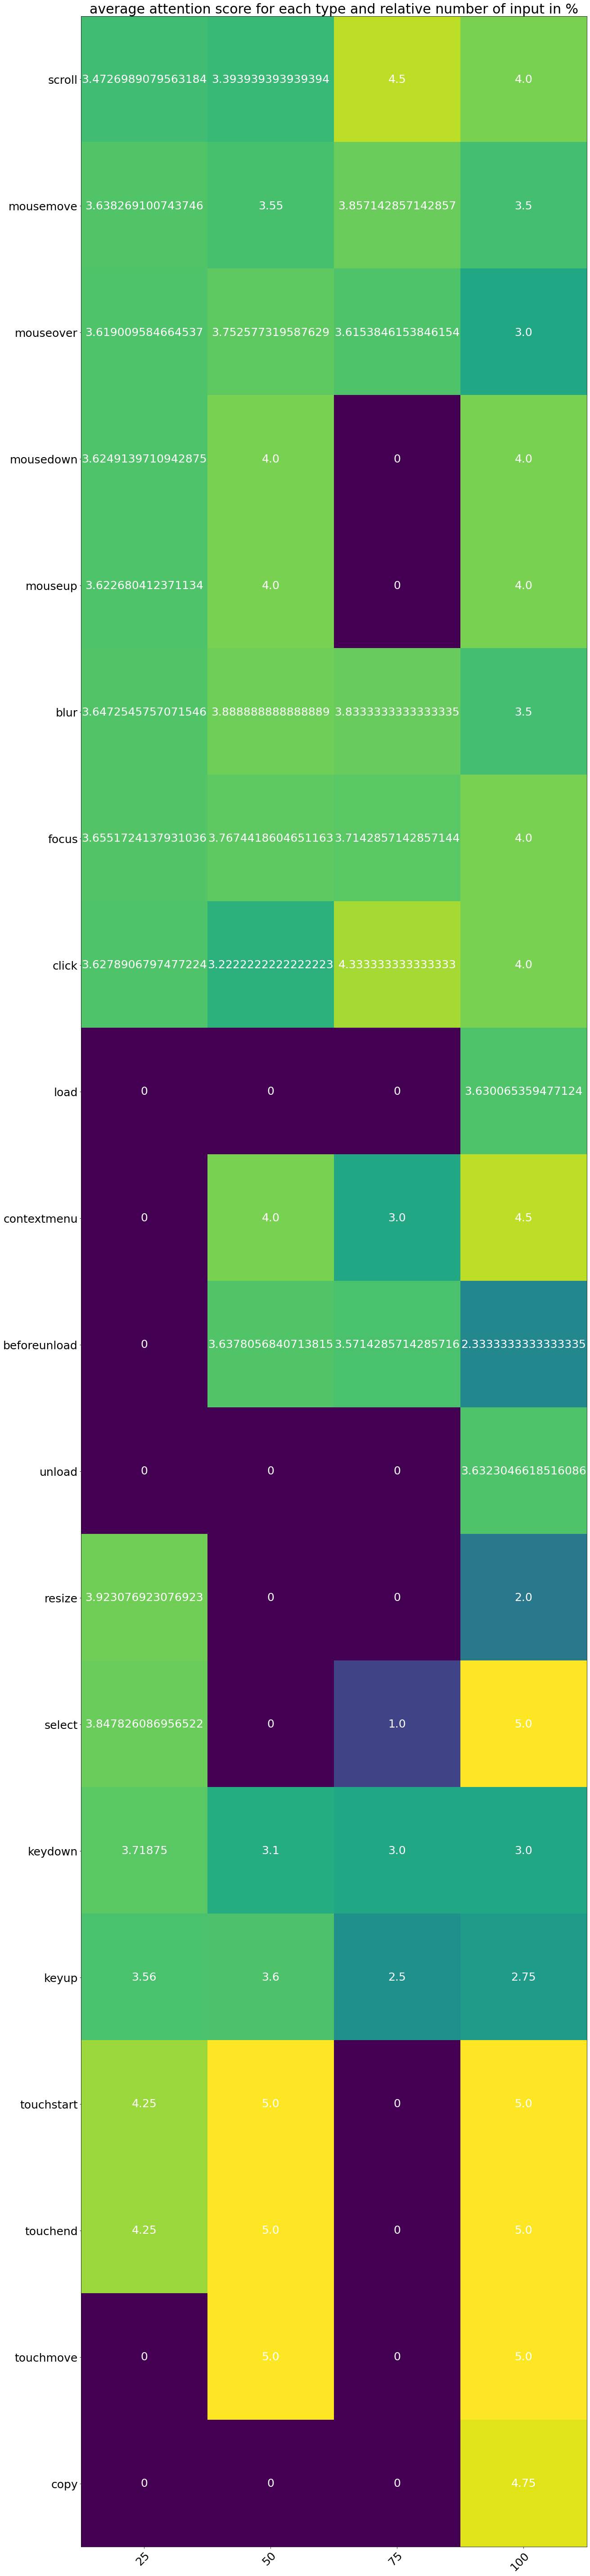

In [57]:
plt. rcParams["figure.figsize"] = (80,80)
plt.rcParams.update({'font.size': 25})

fig, ax = plt.subplots()
im = ax.imshow(xy)

ax.set_xticks(np.arange(len(y)), labels=y)
ax.set_yticks(np.arange(len(x2)), labels=x2)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

for i in range(len(x2)):
    for j in range(len(y)):
        text = ax.text(j, i, xy[i][j],
                       ha="center", va="center", color="w")

ax.set_title("average attention score for each type and relative number of input in %")
fig.tight_layout()
plt.show()